
# Project: Investigate the dataset about population growth from Gapminder

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, the datasets of annual population growth, new birth numbers, children per woman and income per person from Gapminder World will be investigated. Gapminder has collected a lot of data about mentioned information about different countries, they combine data from multiple sources into unique coherent time-series. In this analysis, we consider the annual population growth as the dependent variable, and the other indicators as the three independent variables. 

> To set the goals for the analysis, we raise the following questions:
  - How is the population growth affected by the new brith numbers, is the new birth numbers dominating the population growth?
  - Is the population growth affected by the children per woman, if so, how are they related?
  - Is the population growth affected by the income per person?
  - Which factor influences the most on the population growth?
  - How is the number of children per woman distributed across the period?
  

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

Load the following datasets:
   - Population growth (annual %)
   - New birth (total number, estimated)
   - Children per woman (total fertility)
   - Income per person (GDP/capita, PPP$ inflation-adjusted, in international dollars)

In [2]:
# Load all the datasets
df_ppl_growth = pd.read_csv('population_growth_annual_percent.csv')
df_new_birth = pd.read_csv('new_births_total_number_estimated.csv')
df_chil_per_woman = pd.read_csv('children_per_woman_total_fertility.csv')
df_income_pp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

### Check a few lines of each CSV file

In [3]:
df_ppl_growth.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.0190,0.0197,0.0203,0.02090,0.02150,0.02170,0.02190,0.022500,0.02380,...,0.027500,0.03140,0.03410,0.03490,0.03360,0.03080,0.02780,0.02550,0.023800,0.02310
1,Albania,0.0312,0.0306,0.0295,0.02880,0.02750,0.02630,0.02630,0.028400,0.02900,...,-0.004960,-0.00269,-0.00165,-0.00183,-0.00207,-0.00291,-0.00160,-0.00092,-0.002470,-0.00426
2,Algeria,0.0249,0.0247,0.0249,0.02560,0.02660,0.02760,0.02850,0.028800,0.02870,...,0.018100,0.01880,0.01950,0.02000,0.02030,0.02050,0.02050,0.02040,0.020100,0.01930
3,Andorra,0.0694,0.0669,0.0656,0.06240,0.06000,0.05750,0.05500,0.053100,0.05200,...,-0.000166,-0.00835,-0.01590,-0.02030,-0.01950,-0.01530,-0.00919,-0.00384,0.000065,0.00176
4,Angola,0.0139,0.0138,0.0126,0.00974,0.00618,0.00184,-0.00121,-0.000449,0.00546,...,0.036700,0.03630,0.03600,0.03550,0.03500,0.03440,0.03380,0.03320,0.032800,0.03240


In [4]:
df_new_birth.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,158000.0,158000.0,158000.0,158000.0,158000.0,158000.0,158000.0,158000.0,158000.0,...,1090000,1100000,1100000,1100000,1100000,1090000,1090000,1080000,1080000,1080000
1,Albania,13500.0,13600.0,13600.0,13600.0,13700.0,13700.0,13800.0,13800.0,13900.0,...,36100,35000,34400,34500,35000,35900,37000,38000,38900,39500
2,Algeria,120000.0,121000.0,121000.0,122000.0,122000.0,123000.0,123000.0,123000.0,124000.0,...,735000,778000,820000,859000,893000,919000,936000,944000,944000,936000
3,Angola,74700.0,74700.0,74700.0,74700.0,74700.0,74700.0,74700.0,74800.0,74800.0,...,915000,940000,964000,988000,1010000,1030000,1060000,1080000,1100000,1130000
4,Antigua and Barbuda,1310.0,1310.0,1310.0,1310.0,1310.0,1310.0,1310.0,1300.0,1300.0,...,1520,1510,1500,1490,1480,1480,1480,1480,1480,1490


In [5]:
df_chil_per_woman.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82


In [6]:
df_income_pp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


### Data Cleaning 
- Clean any duplicates or missing values
- Reorganize all the tables so all of them have the same year columns and country/region rows

**First we will check the duplicates and missing values**

In [7]:
# First check if there are duplicates
print(sum(df_ppl_growth.duplicated()))
print(sum(df_new_birth.duplicated()))
print(sum(df_chil_per_woman.duplicated()))
print(sum(df_income_pp.duplicated()))

0
0
0
0


In [8]:
# Check if there are any missing values
print(df_ppl_growth.isnull().values.any())
print(df_new_birth.isnull().values.any())
print(df_chil_per_woman.isnull().values.any())
print(df_income_pp.isnull().values.any())

True
True
False
False


**We can see that the tables of population growth and new brith numbers have missing values**

**Print out the rows with the missing value for population growth**

In [9]:
df_ppl_growth[df_ppl_growth.isnull().any(axis=1)]

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
54,Eritrea,0.0252,0.0259,0.0264,0.0266,0.0265,0.0264,0.0263,0.02640,0.02660,...,0.01610,0.01360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Kuwait,0.1110,0.1150,0.1160,0.1130,0.1080,0.1030,0.0982,0.09220,0.08490,...,0.05880,0.05720,0.05550,0.05170,0.04560,0.03840,0.03110,0.02480,0.01980,0.0167
122,New Zealand,0.0200,0.0254,0.0199,0.0209,0.0165,0.0179,0.0179,0.00877,0.00895,...,0.01110,0.00762,0.00548,0.00768,0.01510,0.01890,0.02100,0.02120,0.00978,0.0156
132,Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02600,0.02530,0.02470,0.02400,0.02340,0.02290,0.02250,0.01990,0.02530,0.0251
149,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.00402,-0.00789,-0.00485,-0.00487,-0.00469,-0.00495,-0.00524,-0.00532,-0.00546,-0.0054


**Print out the rows with the missing value for new birth numbers**

In [10]:
df_new_birth[df_new_birth.isnull().any(axis=1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
151,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,341000,352000,364000,376000,388000,400000,412000,424000,435000,446000


**In this case, fill in with mean values might not be the best solution, considering the impact of filling these missing values. Therefore, we will drop these rows**

In [11]:
df_ppl_growth_v1 = df_ppl_growth.dropna()
df_ppl_growth_v1.isnull().values.any()

False

In [12]:
df_new_birth_v1 = df_new_birth.dropna()
df_new_birth_v1.isnull().values.any()

False

### In order to do the comparison, we need to find all the same years and contries/regions for all the CSV files

**Now we will find all the same years and countries/regions in all the tables**

In [13]:
# Create lists of countries/regions of other tables for the check
check_lst_1 = list(df_new_birth_v1.country)
check_lst_2 = list(df_chil_per_woman.country)
check_lst_3 = list(df_income_pp.country)

In [14]:
# Check the countries/regions in all the tables
country_lst = [country for country in list(df_ppl_growth_v1.country) if all([country in check_lst_1, country in check_lst_2, country in check_lst_3])]

In [15]:
# Create lists of years of other tables for the check
check_lst_4 = [year for year in df_new_birth_v1.columns.values if year != 'country']
check_lst_5 = [year for year in df_chil_per_woman.columns.values if year != 'country']
check_lst_6 = [year for year in df_income_pp.columns.values if year != 'country']

In [16]:
# Check the years in all the tables
year_lst = [year for year in df_ppl_growth_v1.columns.values if all([year in check_lst_4, year in check_lst_5, year in check_lst_6])]

### After the needed row and column names are found, we will reorganize all the tables and make new tables for the analysis.

In [17]:
# Filter the dataframe by the years and countries/regions
# Reset the index column to make the analysis easier
df_ppl_growth_v1.set_index('country', inplace=True)
df_ppl_growth_v2 = df_ppl_growth_v1[df_ppl_growth_v1.index.isin(country_lst)]
df_ppl_growth_clean = df_ppl_growth_v2[year_lst]
df_ppl_growth_clean.shape

(178, 55)

In [18]:
df_new_birth_v1.set_index('country', inplace=True)
df_new_birth_v2 = df_new_birth_v1[df_new_birth_v1.index.isin(country_lst)]
df_new_birth_clean = df_new_birth_v2[year_lst]
df_new_birth_clean.shape

(178, 55)

In [19]:
df_chil_per_woman.set_index('country', inplace=True)
df_chil_per_woman_v1 = df_chil_per_woman[df_chil_per_woman.index.isin(country_lst)]
df_chil_per_woman_clean = df_chil_per_woman_v1[year_lst]
df_chil_per_woman_clean.shape

(178, 55)

In [20]:
df_income_pp.set_index('country', inplace=True)
df_income_pp_v1 = df_income_pp[df_income_pp.index.isin(country_lst)]
df_income_pp_clean = df_income_pp_v1[year_lst]
df_income_pp_clean.shape

(178, 55)

### Till this step all the reorganized tables have the same shapes, with the same country names column and year column names. Now we can go further into the analysis step.

<a id='eda'></a>
## Exploratory Data Analysis

> The amount of data we have to handle will be too large if we analyze all the countries, in this case, we will use the data of China (the country with the largest population in the world) as an example to answer the questions we raised.

**We will put all the data relevant to China from the datasets into one table, first we will make a new table from population growth table.**

In [21]:
df_china = df_ppl_growth_clean.loc[['China'], :].T

# Remove the columns name
df_china.columns.name = None

# Change the labels to population growth
df_china.rename(columns={'China': 'ppl_growth'}, inplace=True)

# Check the changes
df_china.head()

,ppl_growth
1961,-0.0102
1962,0.0082
1963,0.0246
1964,0.0232
1965,0.0238


**Add the other datas**

In [22]:
df_china['new_birth'] = df_new_birth_clean.loc['China', :]
df_china['chil_per_woman'] = df_chil_per_woman_clean.loc['China', :]
df_china['income_pp'] = df_income_pp_clean.loc['China', :]

df_china.head()

,ppl_growth,new_birth,chil_per_woman,income_pp
1961,-0.0102,25300000,3.28,560
1962,0.0082,26300000,5.97,569
1963,0.0246,27300000,7.41,638
1964,0.0232,28300000,6.12,715
1965,0.0238,29100000,6.02,774



### Research question 1: How is the population growth related to the new brith numbers, the children per woman and the income per person? Take the example of China?

**First we will check the line chart of each parameter**

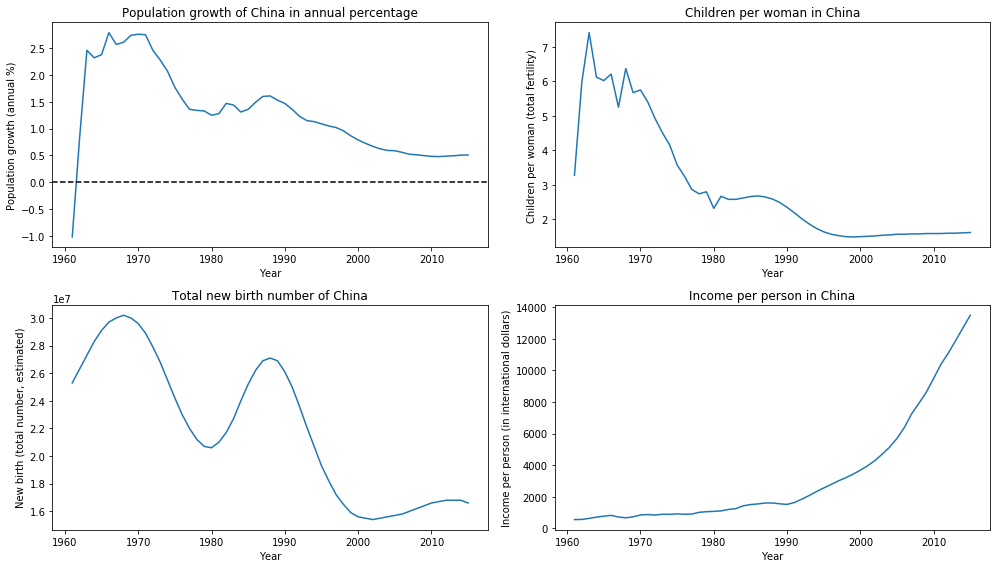

In [23]:
# Plot the line charts for the four columns in the table
x_axis = [float(year) for year in df_china.index]
    
fig, axs = plt.subplots(2, 2, figsize=[14, 8])
axs[0, 0].plot(x_axis, df_china['ppl_growth'] * 100)
axs[0, 0].axhline(y=0.000, color='k', linestyle='--')
axs[0, 0].set_xlabel("Year")
axs[0, 0].set_ylabel("Population growth (annual %)")
axs[0, 0].set_title("Population growth of China in annual percentage");
axs[1, 0].plot(x_axis, df_china['new_birth'])
axs[1, 0].set_xlabel("Year")
axs[1, 0].set_ylabel("New birth (total number, estimated)")
axs[1, 0].set_title("Total new birth number of China")
axs[0, 1].plot(x_axis, df_china['chil_per_woman'])
axs[0, 1].set_xlabel("Year")
axs[0, 1].set_ylabel("Children per woman (total fertility)")
axs[0, 1].set_title("Children per woman in China")
axs[1, 1].plot(x_axis, df_china['income_pp'])
axs[1, 1].set_xlabel("Year")
axs[1, 1].set_ylabel("Income per person (in international dollars)")
axs[1, 1].set_title("Income per person in China")
fig.tight_layout()

**From the line charts we can see there are similar trends among all the parameters except for the income per person. Next we will investigate deeper about the relations between the parameters.**

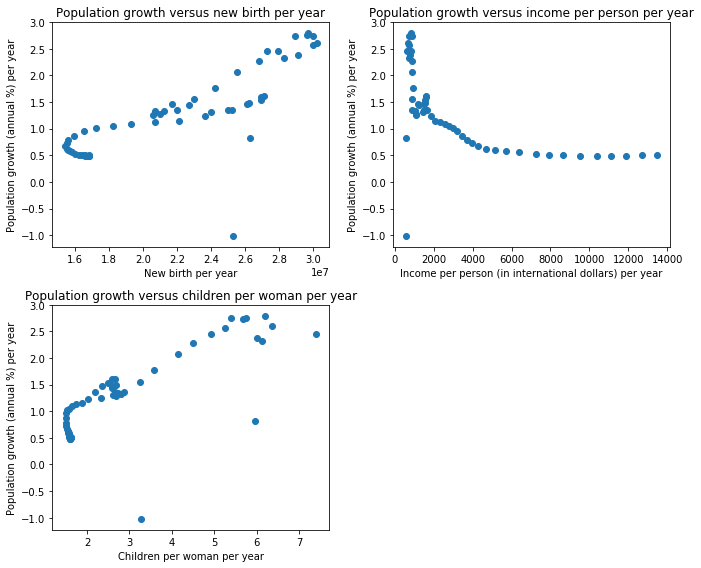

In [24]:
# Plot the scatter plots for the relevant parameters in the table
fig, axs = plt.subplots(2, 2, figsize=[10, 8])
axs[0, 0].scatter(df_china['new_birth'] , df_china['ppl_growth'] * 100)
axs[0, 0].set_xlabel("New birth per year")
axs[0, 0].set_ylabel("Population growth (annual %) per year")
axs[0, 0].set_title("Population growth versus new birth per year");
axs[1, 0].scatter(df_china['chil_per_woman'], df_china['ppl_growth'] * 100)
axs[1, 0].set_xlabel("Children per woman per year")
axs[1, 0].set_ylabel("Population growth (annual %) per year")
axs[1, 0].set_title("Population growth versus children per woman per year")
axs[0, 1].scatter(df_china['income_pp'], df_china['ppl_growth'] * 100)
axs[0, 1].set_xlabel("Income per person (in international dollars) per year")
axs[0, 1].set_ylabel("Population growth (annual %) per year")
axs[0, 1].set_title("Population growth versus income per person per year")
fig.delaxes(axs[1][1])
fig.tight_layout()

### Research Question 2: Which factor is related the most to the population growth? Take the example of China?

**In these case we check the correlations between all the factors and the population growth.**

In [25]:
print(f"Correlation  between population growth and new birth: {df_china['ppl_growth'].corr(df_china['new_birth'])}.")
print(f"Correlation between population growth and children per woman: {df_china['ppl_growth'].corr(df_china['chil_per_woman'])}.")
print(f"Correlation between population growth and income per person: {df_china['ppl_growth'].corr(df_china['income_pp'])}.")

Correlation  between population growth and new birth: 0.7964374493929265.
Correlation between population growth and children per woman: 0.7883756667950349.
Correlation between population growth and income per person: -0.6051542066325882.


### Research Question 3: How is the number of children per woman distributed across the period? Take the example of China?

**First we will round all the floats of of children per woman into intergers, so that we can categorize them.**

In [26]:
child_per_woman_counts = df_china['chil_per_woman'].round(0).astype(int).value_counts().sort_index()
child_per_woman_counts.index

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64')

**Now we create the pie chart to check the distribution**

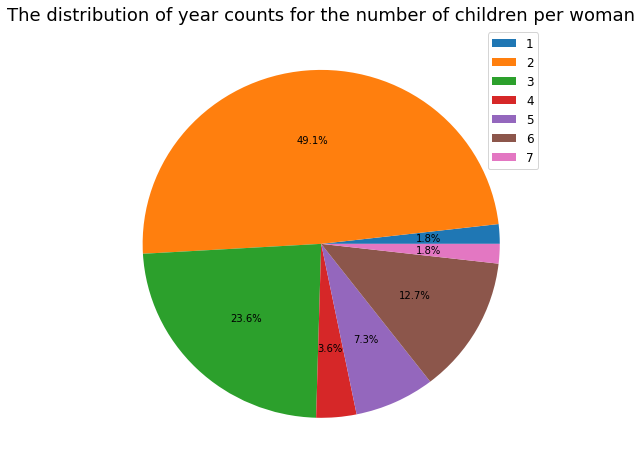

In [27]:
_, axs = plt.subplots(figsize=[8, 8])
wedges,_,_ = axs.pie(child_per_woman_counts, autopct="%1.1f%%")
axs.set_title('The distribution of year counts for the number of children per woman', fontsize=18)
legends = sorted(list(child_per_woman_counts.index))
axs.legend(wedges,legends, loc="upper right", fontsize=12);

<a id='conclusions'></a>
## Conclusions

> There is a positive correlation between population growth yearly and new birth number yearly in China.

> There is a negative correlation between population growth yearly and income per person yearly in China.

> There is a positive correlation between population growth yearly and children per woman yearly in China.

> In this analysis, the correlation between between population growth yearly and new birth number yearly is the largest.

> It can be seen from the pie chart that around half of the analyzed years in China, in average every woman has 2 children.

> **Limitations of this analysis**: The findings are only applied for China, the analyses for the other countries/regions are not included. The correlations do not imply the causations between datasets in this case, further investigations are needed if the reasons between the correlations are requested.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0